# Bio-Inspired Algorithms
## 2-D Genetic Algorithm

### Dr. Carlos Lopez-Franco @ UDG
### Dariana Gomez-Alvarez

Objective Function
$$ f(x,y) = x^2 + y^2 $$

## Libraries

In [141]:
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Main

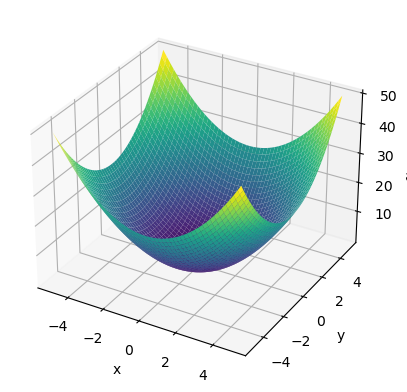

****************************************************************************************************
Fittest individual found. Fitness: 0.008888888888888885 in Gen 1.
 [[1 0 0 1 1 0 0 1]
 [0 1 1 1 0 1 1 1]
 [1 1 0 1 1 1 0 1]
 [0 1 1 1 0 1 1 1]
 [0 1 1 1 0 1 1 1]
 [0 1 1 0 0 1 0 0]]
****************************************************************************************************


In [172]:
################### Initial Parameters ########################

iterations = 50
inds_per_tourn = 3
ind_size = 8
inds_per_gen = 6
bits_chrom = 6

create_random_binary_population(inds_per_gen, ind_size)


l_sel = rand_list_tour(iterations, inds_per_tourn, 0, (inds_per_gen-1))

l_rand = rand_list_cross_mut(iterations**2, 0, 1)

cr_valid, mu_valid = sep_cross_mut(l_rand)


l_cross = rand_list_crossover(iterations, 1, bits_chrom)

ran_min_x = -1
ran_max_x = 1

ran_min_y = -1
ran_max_y = 1

r_cross = 0.9
r_mut = 0.25

curr_best_fitness = 0.01

x_values_bin, y_values_bin = split_population(pop)

################ Objective Function #######################

obj_function = lambda x, y: x**2 + y**2
plot_function_3d(obj_function)

######################## Iterations ###############################

for gen in range(iterations):
        
    combined_array = np.hstack((x_values_bin, y_values_bin))
    
    x, y = binary_population_to_decoded_values(x_values_bin, y_values_bin, ran_min_x, ran_max_x, ran_min_y, ran_max_y)
    
    x_values = np.array(x)
    y_values = np.array(y)
    

    ####################### Fitnesses #######################
    fitnesses = np.array([])
    
    fitnesses = obj_function(x_values, y_values)

      
    ##################### Tournament #########################
    champs = tournament(gen, l_sel, fitnesses)
   
    fit_dict = {index: value for index, value in enumerate(fitnesses)} 
        
    subtourns = champs_fcn(champs)
    
    best_fitness = min(champs)
    
        
    ############## Creating new generation #################
    new_x_list = []
    new_y_list = []
    
    for item in subtourns:
        new_x_list.append(x_values_bin[item])
        new_y_list.append(y_values_bin[item])

    x_values_bin = np.array(new_x_list)
    y_values_bin = np.array(new_y_list)

       
    ################## Crossover #####################
    if cr_valid[0] < r_cross:
        x_values_bin, y_values_bin = crossover(x_values_bin, y_values_bin, l_cross[gen])
        cr_valid = cr_valid[1:]
    else:
        pass
    
        
    ################# Mutation #######################
    position = 0
    for mutating in range(ind_size*3):
        if mu_valid[0] < r_mut:
            x_values_bin, y_values_bin = mutation(x_values_bin, y_values_bin, position)
            mu_valid = mu_valid[1:]
        else:
            mu_valid = mu_valid[1:]
            position += 1
        if position > 7:
            position = 0
    
    if best_fitness < curr_best_fitness:
        print('*'*100)
        print(f"Fittest individual found. Fitness: {best_fitness} in Gen {gen}.\n",combined_array)
        print('*'*100)
        break
    else:
        best_fitness = curr_best_fitness
        

## Functions Definitions

In [6]:
def split_population(population):
    # Split each row into two arrays of shape (6, 4) for x and y
    x_array = population[:, :4]
    y_array = population[:, 4:]
    return x_array, y_array

In [45]:
def binary_population_to_decoded_values(x, y, minx_value, maxx_value, miny_value, maxy_value):
    decoded_x = []
    decoded_y = []
    bits_per_individual = 4  # It's actually 8, but we are working separately
    
    #print(x,y)

    for row_x, row_y in zip(x, y):
        binary_x = "".join(map(str, row_x))
        binary_y = "".join(map(str, row_y))

        decimal_x = int(binary_x, 2)
        decimal_y = int(binary_y, 2)

        decoded_x_value = minx_value + decimal_x * (maxx_value - minx_value) / (2 ** bits_per_individual - 1)
        decoded_y_value = miny_value + decimal_y * (maxy_value - miny_value) / (2 ** bits_per_individual - 1)

        decoded_x.append(decoded_x_value)
        decoded_y.append(decoded_y_value)

    #print(decoded_x, decoded_y)
    
    return decoded_x, decoded_y

In [8]:
def tournament(generation, selection, fitnesses): 
    # Separate tournaments' list into smaller lists (same amount as individuals in initial population)

    n = 6 # Number of elements per smaller list

    tournaments= []

    smaller_lists = [selection[i:i + n] for i in range(0, len(selection), n)]

    for sublist in smaller_lists:
        tournaments.append(sublist)
        
    sorted_list = []
    comps = 3 # competitors per tournament
    
    # actual tournament process
    
    champs = []
    
    for tourns in tournaments[generation]:
        for competitor in tourns:
            sorted_list.append(fitnesses[competitor])
    smaller_tourns = [sorted_list[i:i + comps] for i in range(0, len(sorted_list), comps)]
    for element in smaller_tourns:
        champs.append(min(element))
        
    return champs

In [9]:
def champs_fcn(champions):
    # Retrieve indices to know which individuals will integrate new population

    indices = [key for value in champions for key, dict_value in fit_dict.items() if value == dict_value]
    subtourns_ = [indices[i:i+6] for i in range(0, len(indices), 6)]

    subtourns = subtourns_[0]
    
    return subtourns


In [10]:
def sep_cross_mut(list_randoms):
    # Separate items in l_rand list so that we have separate lists for crossover and mutation (for now).
    pos = ind_size*2 + 1
    
    c_val = list_randoms[::pos]

    m_val = []

    for i in range(1, len(list_randoms), 1):
        if i % pos != 0:
            m_val.append(list_randoms[i])
            
    cross_valid = np.array(c_val)
    mut_valid = np.array(m_val)
            
    return cross_valid, mut_valid

In [11]:
def crossover(x4cross, y4cross, bit):
    for t in range(5):
        if bit < 4:
            # Swap bits in x4cross and y4cross
            tmp = x4cross[t][bit]
            #print("current bit:", tmp)
            x4cross[t][bit] = x4cross[t][bit]
            x4cross[t][bit] = tmp
        else:
            bit -= 4  # Move to the next 4 bits
            # Swap bits in x4cross and y4cross
            tmp = y4cross[t][bit]
            y4cross[t][bit] = y4cross[t][bit]
            y4cross[t][bit] = tmp
    return x4cross, y4cross


In [12]:
def mutation(x4mut, y4mut, ind):
    for t in range(5):
        if ind < 4:
            x4mut[t][ind] = 1 - x4mut[t][ind]
        else:
            ind -= 4
            y4mut[t][ind] = 1 - y4mut[t][ind]
        
    return x4mut, y4mut

In [131]:
def create_random_binary_population(num_individuals, chromosome_length):
    population = np.random.randint(2, size=(num_individuals, chromosome_length))
    return population

In [13]:
def rand_list_tour(num_lists, list_length, min_value, max_value):
    random_list = []
    for _ in range(num_lists):
        inner_list = [random.randint(min_value, max_value) for _ in range(list_length)]
        random_list.append(inner_list)
    return random_list

#l_sel = generate_random_list(54, 3, 0, 5)
#print(l_sel)


In [14]:
def rand_list_cross_mut(num_values, min_value, max_value):
    random_list = [random.uniform(min_value, max_value) for _ in range(num_values)]
    return random_list

random_values = rand_list_cross_mut(256, 0, 1)
#print(random_values)


In [15]:
def rand_list_crossover(num_values, min_value, max_value):
    random_list = [random.randint(min_value, max_value) for _ in range(num_values)]
    return random_list

random_integers = rand_list_crossover(14, 1, 6)
#print(random_integers)


In [150]:
def plot_function_3d(obj_function):
    x = np.linspace(-5, 5, 400)
    y = np.linspace(-5, 5, 400)

    X, Y = np.meshgrid(x, y)

    Z = obj_function(X, Y)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.plot_surface(X, Y, Z, cmap='viridis')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('f(x, y)')
    plt.show()
